<a href="https://colab.research.google.com/github/kathrynpav/Microsoft-Excel-Projects/blob/master/JP_Morgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
vix_df= yf.download('^VIX')

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


In [ ]:
vix_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0
...,...,...,...,...,...,...
2024-01-23,13.200000,13.290000,12.530000,12.550000,12.550000,0
2024-01-24,12.660000,13.180000,12.410000,13.140000,13.140000,0
2024-01-25,13.180000,13.580000,13.060000,13.450000,13.450000,0


In [ ]:
# calc 1 month mov average
vix_df['MA']=vix_df.Close.rolling('30D').mean()
vix_df

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0,17.240000
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0,17.715000
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0,18.216667
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0,18.690000
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0,19.004000
...,...,...,...,...,...,...,...
2024-01-23,13.200000,13.290000,12.530000,12.550000,12.550000,0,13.185789
2024-01-24,12.660000,13.180000,12.410000,13.140000,13.140000,0,13.183500
2024-01-25,13.180000,13.580000,13.060000,13.450000,13.450000,0,13.206500


In [ ]:
#  Choose those days where cond 1.5 time MA/close price has to 50% more than MA
vix_df_filt = vix_df[vix_df.Close>1.5*vix_df.MA]
vix_df_filt

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1990-08-07,32.750000,32.750000,32.750000,32.750000,32.750000,0,20.895000
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
...,...,...,...,...,...,...,...
2020-03-19,80.620003,84.260002,68.570000,72.000000,72.000000,0,44.842273
2021-01-27,23.820000,37.209999,23.709999,37.209999,37.209999,0,23.929500
2021-11-26,26.620001,28.990000,23.879999,28.620001,28.620001,0,17.673810


In [ ]:
# cond is min distance b/w the dates must be 1 month
# pd .series-for converrion of df in to series
#np.timedelta64 conversion to float
#>=30 check for differnece grater than 1 month
series = pd.Series(vix_df_filt.index).diff()/np.timedelta64(1,'D')>=30
series

0     False
1     False
2      True
3      True
4      True
      ...  
60    False
61     True
62     True
63    False
64     True
Name: Date, Length: 65, dtype: bool

In [ ]:
# very first false has to converted to true
series[0]=True
series

0      True
1     False
2      True
3      True
4      True
      ...  
60    False
61     True
62     True
63    False
64     True
Name: Date, Length: 65, dtype: bool

In [ ]:
signals=vix_df_filt[series.values]
# screen for series in vix_df_filt
signals

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
2007-02-27,12.120000,19.010000,12.100000,18.309999,18.309999,0,10.921905
2008-09-17,31.959999,36.400002,30.250000,36.220001,36.220001,0,23.478095
2010-05-06,25.879999,40.709999,24.430000,32.799999,32.799999,0,18.951364
2011-08-04,24.570000,32.070000,24.309999,31.660000,31.660000,0,20.732273
2014-10-13,21.160000,24.639999,20.520000,24.639999,24.639999,0,15.625714


In [ ]:
signals.shape

(21, 7)

In [ ]:
# permance of s & p  6 months after those buying signals occured
sp_df =yf.download('^GSPC',start='1990-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
sp_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
...,...,...,...,...,...,...
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,4864.600098,3912800000
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000


In [ ]:
from pandas.tseries.offsets import DateOffset
signals.index[0]+DateOffset(months=6)
# offset helps to add days to a specific month

Timestamp('1991-02-06 00:00:00')

In [ ]:
# calc of S&P perfomr after 6 months of buying signals
test=sp_df[(sp_df.index >= signals.index[0]) &
           (sp_df.index<=signals.index[0] + DateOffset(months=6))]
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-08-06,344.859985,344.859985,333.269989,334.429993,334.429993,240400000
1990-08-07,334.429993,338.630005,332.220001,334.829987,334.829987,231580000
1990-08-08,334.829987,339.209991,334.829987,338.350006,338.350006,190400000
1990-08-09,338.350006,340.559998,337.559998,339.940002,339.940002,155810000
1990-08-10,339.899994,339.899994,334.220001,335.519989,335.519989,145340000
...,...,...,...,...,...,...
1991-01-31,340.920013,343.929993,340.470001,343.929993,343.929993,204520000
1991-02-01,343.910004,344.899994,340.369995,343.049988,343.049988,246670000
1991-02-04,343.049988,348.709991,342.959991,348.339996,348.339996,250750000


In [ ]:
(test.Close.pct_change()+1).cumprod()
# retrn of s5 p after 1 st buying signal =7% return

Date
1990-08-06         NaN
1990-08-07    1.001196
1990-08-08    1.011721
1990-08-09    1.016476
1990-08-10    1.003259
                ...   
1991-01-31    1.028407
1991-02-01    1.025775
1991-02-04    1.041593
1991-02-05    1.050324
1991-02-06    1.070687
Name: Close, Length: 129, dtype: float64

In [ ]:
returns =[]

# loopinf through the entire filtered set
for i in range(len(signals)):
  subdf=sp_df[(sp_df.index >= signals.index[i]) &
           (sp_df.index<=signals.index[i] + DateOffset(months=6))]
  returns.append((subdf.Close.pct_change()+1).prod())


In [ ]:
returns

[1.0706874836772058,
 1.0357012267173276,
 1.2302474426905545,
 1.122635436384584,
 1.0484260622343589,
 0.6728871619959027,
 1.086601913803633,
 1.1206846972319002,
 1.1161174043015076,
 1.0626286532638536,
 0.9730527908930336,
 1.1111116569983719,
 1.0743742707953239,
 1.0722591529003795,
 1.0368061054438837,
 1.2527540195300035,
 1.172230134512753,
 1.063669295468296,
 1.1734816952300284,
 0.8831720543579019,
 0.9105670695280556]

In [ ]:
# calc mean ,v need to convert to series
pd.Series(returns).mean()
# 6 % is the return

1.0614331299028028

<Axes: >

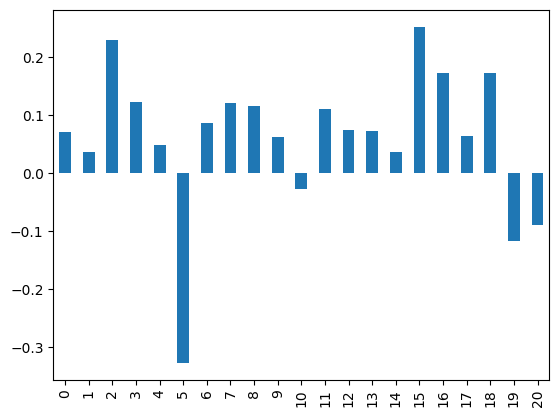

In [ ]:
(pd.Series(returns)-1).plot(kind='bar')